In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/PLUS VAIO/OneDrive/سطح المكتب/work/351-EXCEL.csv')

#Separate into two groups
standard_rates = df[df['lunch'] == 'standard']['reading score']
free_rates = df[df['lunch'] == 'free/reduced']['reading score']

from scipy import stats
t_statistic, p_value = stats.ttest_ind(standard_rates, free_rates, equal_var=False)

print("\n--- Results of the independent samples t-test ---")
print(f"1.  (t-statistic): {t_statistic:.3f}")
print(f"2.  (P-Value): {p_value:.3f}")
mean_standard = standard_rates.mean()
mean_free = free_rates.mean()
std_st = standard_rates.std(ddof=1) # ddof=1 
std_free = free_rates.std(ddof=1)
n_st = len(standard_rates)
n_free = len(free_rates)

# (Pooled Standard Deviation)
sp = (( (n_st - 1) * std_st**2 + (n_free - 1) * std_free**2 ) / (n_st + n_free - 2) )**0.5

#  (Cohen's d)
cohens_d = (mean_standard - mean_free) / sp

print(f"\n3.  (Cohen's d): {cohens_d:.3f}")


--- Results of the independent samples t-test ---
1.  (t-statistic): 7.293
2.  (P-Value): 0.000

3.  (Cohen's d): 0.492


In [7]:
pivot_table = df.pivot_table(values='reading score', index='lunch', aggfunc='mean')
print(pivot_table)

              reading score
lunch                      
free/reduced      64.653521
standard          71.654264


C:\Users\PLUS VAIO\AppData\Local\Temp\ipykernel_15532\4112550030.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='lunch', y='reading score', data=df, ci='sd', palette='pastel', capsize=0.2)
C:\Users\PLUS VAIO\AppData\Local\Temp\ipykernel_15532\4112550030.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lunch', y='reading score', data=df, ci='sd', palette='pastel', capsize=0.2)


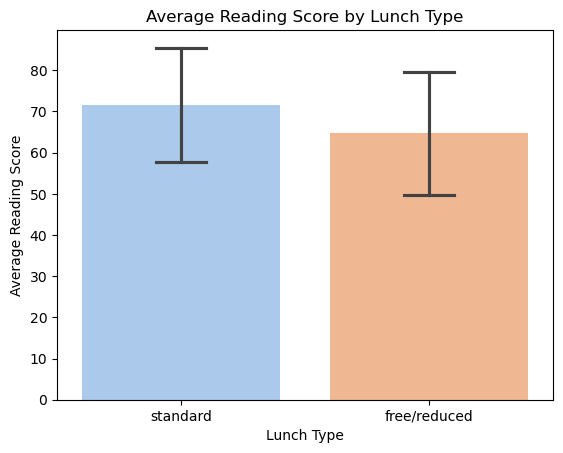

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='lunch', y='reading score', data=df, ci='sd', palette='pastel', capsize=0.2)
plt.title('Average Reading Score by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Average Reading Score')
plt.show()

C:\Users\PLUS VAIO\AppData\Local\Temp\ipykernel_15532\2576941983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='lunch', y='reading score', data=df, palette='pastel')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


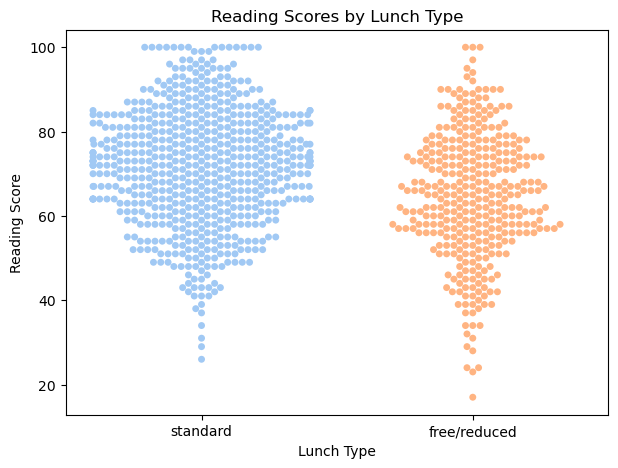

In [9]:
plt.figure(figsize=(7,5))
sns.swarmplot(x='lunch', y='reading score', data=df, palette='pastel')
plt.title('Reading Scores by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Reading Score')
plt.show()

In [10]:
df['reading_level'] = pd.cut(df['reading score'],
                             bins=[0, 69, 100],
                             labels=['Low', 'High'])

crosstab = pd.crosstab(df['lunch'], df['reading_level'])
print(crosstab)

reading_level  Low  High
lunch                   
free/reduced   218   137
standard       269   376
